C:\Users\elisa\AppData\Local\Temp\ipykernel_138768\393025342.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2024-12-07", end="2025-12-07")['Close']
[*********************100%***********************]  1 of 1 completed


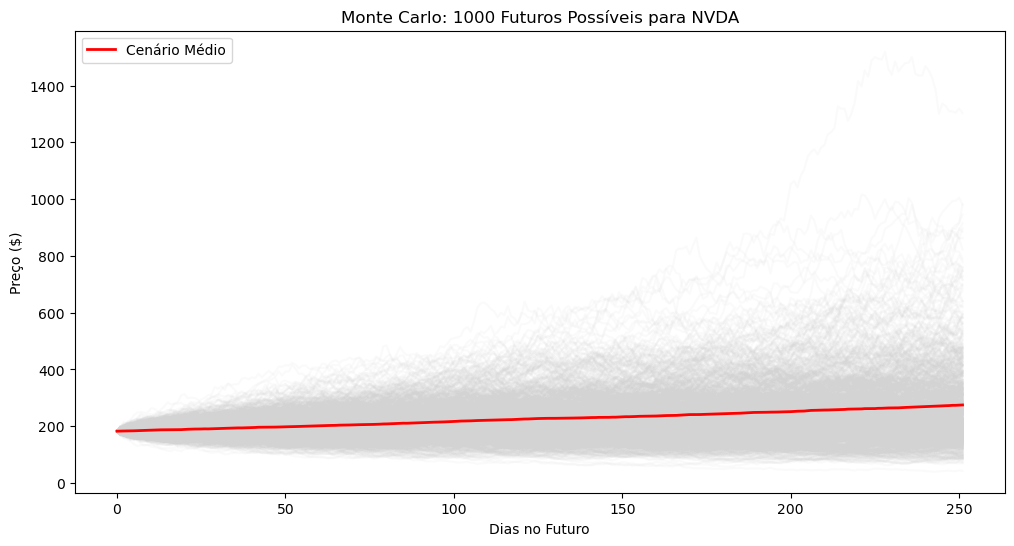

--- RELATÓRIO DE FUTURO ---
Preço Atual: $182.41
Preço Médio Estimado (1 Ano): $274.84
Risco Extremo (VaR 95%): Há 5% de chance de cair abaixo de $110.31


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 1. DADOS: Buscar o ativo
ticker = "NVDA"
data = yf.download(ticker, start="2024-12-07", end="2025-12-07")['Close']
preço_atual = data.iloc[-1]

# 2. PARÂMETROS DO MODELO (Calibrar a Física)
retornos = data.pct_change().dropna()

# Usamos .item() para extrair o valor puro (escalar) de dentro da Series do Pandas
mu = retornos.mean().item()   # Drift como float puro
sigma = retornos.std().item() # Volatilidade como float puro
preço_atual = data.iloc[-1].item() # Preço inicial como float puro

# 3. O MOTOR MONTE CARLO (A Magia)
dias_simulacao = 252
num_cenarios = 1000
dt = 1

simulacoes = np.zeros((dias_simulacao, num_cenarios))
simulacoes[0] = preço_atual

for t in range(1, dias_simulacao):
    drift = (mu - 0.5 * sigma**2)
    choque = sigma * np.random.normal(0, 1, num_cenarios)
    
    simulacoes[t] = simulacoes[t-1] * np.exp(drift + choque)

# 4. VISUALIZAÇÃO (Spaghetti Plot)
plt.figure(figsize=(12, 6))
plt.plot(simulacoes, color='lightgray', alpha=0.1) # 1000 caminhos cinzentos
plt.plot(simulacoes.mean(axis=1), color='red', linewidth=2, label='Cenário Médio') # A média
plt.title(f"Monte Carlo: 1000 Futuros Possíveis para {ticker}")
plt.xlabel("Dias no Futuro")
plt.ylabel("Preço ($)")
plt.legend()
plt.show()

# 5. ESTATÍSTICA FINAL (VaR - Value at Risk)
precos_finais = simulacoes[-1]
pior_cenario_5pct = np.percentile(precos_finais, 5)

print(f"--- RELATÓRIO DE FUTURO ---")
print(f"Preço Atual: ${float(preço_atual):.2f}")
print(f"Preço Médio Estimado (1 Ano): ${np.mean(precos_finais):.2f}")
print(f"Risco Extremo (VaR 95%): Há 5% de chance de cair abaixo de ${pior_cenario_5pct:.2f}")